In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rotten-fresh-fruit-tests/rottenbanana.jpg
/kaggle/input/rotten-fresh-fruit-tests/rotttenbanana.jpg
/kaggle/input/rotten-fresh-fruit-tests/strawberry_test.jpeg
/kaggle/input/rotten-fresh-fruit-tests/rottenguava.jpeg
/kaggle/input/rotten-fresh-fruit-tests/rotten_strawberry_test.jpg
/kaggle/input/classification-fruits/Test/Test/RottenBanana/RottenBanana (595).jpg
/kaggle/input/classification-fruits/Test/Test/RottenBanana/RottenBanana (349).jpg
/kaggle/input/classification-fruits/Test/Test/RottenBanana/RottenBanana (91).jpg
/kaggle/input/classification-fruits/Test/Test/RottenBanana/RottenBanana (312).jpg
/kaggle/input/classification-fruits/Test/Test/RottenBanana/RottenBanana (479).jpg
/kaggle/input/classification-fruits/Test/Test/RottenBanana/RottenBanana (472).jpg
/kaggle/input/classification-fruits/Test/Test/RottenBanana/RottenBanana (697).jpg
/kaggle/input/classification-fruits/Test/Test/RottenBanana/RottenBanana (531).jpg
/kaggle/input/classification-fruits/Test/Test/Rott

In [2]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Preparing the data

In [3]:
train_data_dir = '/kaggle/input/classification-fruits/Test/Test'
test_data_dir = '/kaggle/input/classification-fruits/Train/Train'

In [4]:
train_data = tf.keras.utils.image_dataset_from_directory(train_data_dir)
test_data = tf.keras.utils.image_dataset_from_directory(test_data_dir)

Found 12335 files belonging to 16 classes.
Found 3200 files belonging to 16 classes.


In [5]:
class_names = train_data.class_names
num_classes = len(class_names)
num_classes

16

## Normalizing the values between 0 - 1

In [6]:
train_data = train_data.map(lambda x,y: (x/255, y))
test_data = test_data.map(lambda x,y: (x/255, y))

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.regularizers import l2

In [8]:
train_data

<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

# Creating the model

In [9]:
model = Sequential()

In [10]:
model.add(Conv2D(16, (3, 3), input_shape=(256,256,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D())
model.add(Conv2D(256, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

# Fitting the model

In [13]:
cp = ModelCheckpoint('models/model', save_best_only=True)

In [14]:
hist = model.fit(train_data, epochs=20, validation_data=test_data, callbacks=[cp])

Epoch 1/20
386/386 [==============================] - 101s 229ms/step - loss: 1.4474 - accuracy: 0.5696 - val_loss: 0.9748 - val_accuracy: 0.6866
Epoch 2/20
386/386 [==============================] - 72s 186ms/step - loss: 0.7843 - accuracy: 0.7482 - val_loss: 0.7256 - val_accuracy: 0.7547
Epoch 3/20
386/386 [==============================] - 71s 184ms/step - loss: 0.6293 - accuracy: 0.8082 - val_loss: 0.6097 - val_accuracy: 0.8094
Epoch 4/20
386/386 [==============================] - 72s 185ms/step - loss: 0.4742 - accuracy: 0.8608 - val_loss: 0.4739 - val_accuracy: 0.8603
Epoch 5/20
386/386 [==============================] - 72s 186ms/step - loss: 0.3825 - accuracy: 0.8931 - val_loss: 0.4213 - val_accuracy: 0.8756
Epoch 6/20
386/386 [==============================] - 73s 189ms/step - loss: 0.3227 - accuracy: 0.9137 - val_loss: 0.3151 - val_accuracy: 0.9144
Epoch 7/20
386/386 [==============================] - 72s 185ms/step - loss: 0.2657 - accuracy: 0.9342 - val_loss: 0.2683 - val_a

# Loading the Model

In [15]:
saved_model = tf.keras.models.load_model('/kaggle/working/models/model')

In [16]:
saved_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
loss, accuracy = saved_model.evaluate(test_data)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

100/100 [==============================] - 45s 414ms/step - loss: 0.1229 - accuracy: 0.9737
Loss: 0.12285300344228745
Accuracy: 0.9737499952316284


# Plotting the model's loss and accuracy

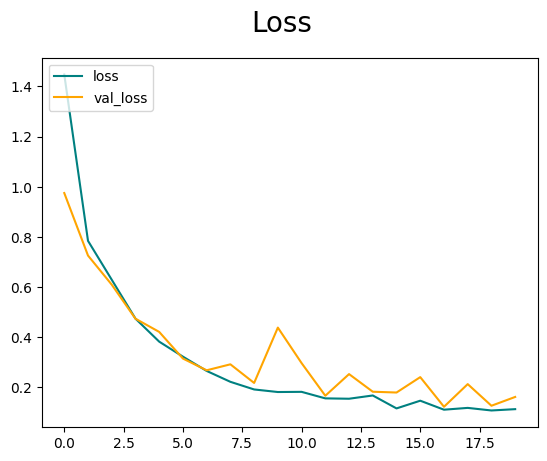

In [19]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

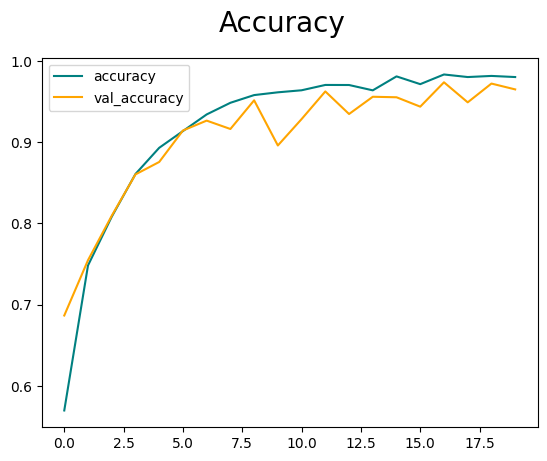

In [20]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [21]:
import cv2

# Testing

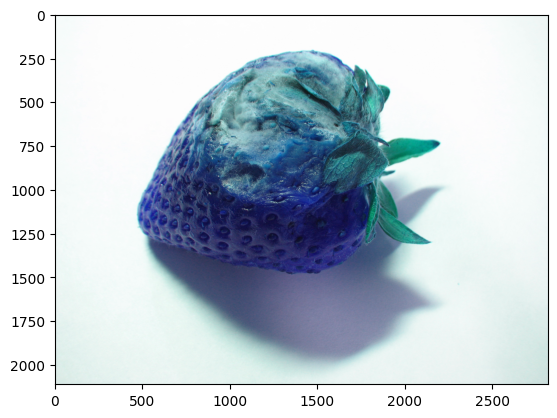

In [80]:
img_rottenstrawberry = cv2.imread('/kaggle/input/rotten-fresh-fruit-tests/rotten_strawberry_test.jpg')
plt.imshow(img_rottenstrawberry)
plt.show()

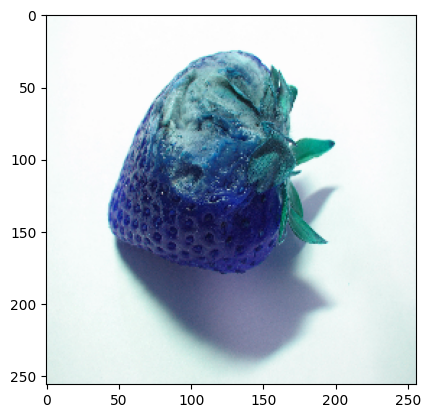

In [81]:
resize_rottenstrawberry = tf.image.resize(img_rottenstrawberry, (256,256))
plt.imshow(resize_rottenstrawberry.numpy().astype(int))
plt.show()

In [82]:
yhat_rottenstrawberry = saved_model.predict(np.expand_dims(resize_rottenstrawberry/255, 0))

1/1 [==============================] - 0s 98ms/step


In [83]:
predicted_class_index_rottenstrawberry = np.argmax(yhat_rottenstrawberry)

In [84]:
predicted_class_label_rottenstrawberry = class_names[predicted_class_index_rottenstrawberry]

In [85]:
print("Predicted Class:", predicted_class_label_rottenstrawberry)

Predicted Class: RottenStrawberry


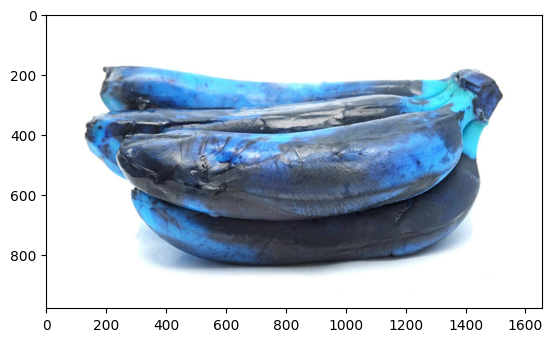

In [96]:
img_rottenbanana = cv2.imread('/kaggle/input/rotten-fresh-fruit-tests/rottenbanana.jpg')
plt.imshow(img_rottenbanana)
plt.show()

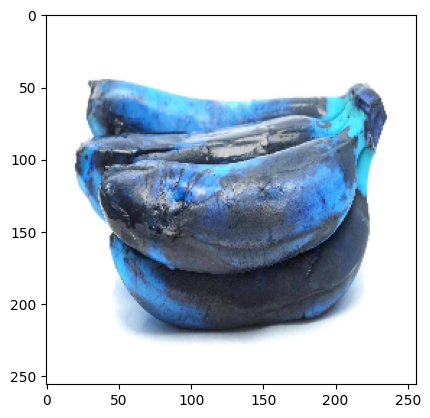

In [97]:
resize_rottenbanana = tf.image.resize(img_rottenbanana, (256,256))
plt.imshow(resize_rottenbanana.numpy().astype(int))
plt.show()

In [98]:
yhat_rottenbanana = saved_model.predict(np.expand_dims(resize_rottenbanana/255, 0))

1/1 [==============================] - 0s 20ms/step


In [99]:
predicted_class_index_rottenbanana = np.argmax(yhat_rottenbanana)

In [100]:
predicted_class_label_rottenbanana = class_names[predicted_class_index_rottenbanana]

In [101]:
print("Predicted Class:", predicted_class_label_rottenbanana)

Predicted Class: RottenBanana
